# Use the available variables to construct a model that predicts delays,

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset required for Q5

In [2]:
cleaned_dataset = pd.read_csv("C:/Users/94772/OneDrive/Documents/PROG CW - final/cleaned_dataset.csv")
cleaned_dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Total_Delay
0,2006,1,11,3,743,745,1024,1018,US,343,...,45,13,0,0,0,0,0,0,0,4
1,2006,1,11,3,1053,1053,1313,1318,US,613,...,27,19,0,0,0,0,0,0,0,-5
2,2006,1,11,3,1915,1915,2110,2133,US,617,...,4,11,0,0,0,0,0,0,0,-23
3,2006,1,11,3,1753,1755,1925,1933,US,300,...,16,10,0,0,0,0,0,0,0,-10
4,2006,1,11,3,824,832,1015,1015,US,765,...,27,12,0,0,0,0,0,0,0,-8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007,12,15,6,1558,1605,1749,1736,DL,58,...,14,17,0,0,0,0,0,0,0,6
14268924,2007,12,15,6,1902,1851,2110,2105,DL,59,...,6,21,0,0,0,0,0,0,0,16
14268925,2007,12,15,6,1024,1025,1750,1735,DL,61,...,14,19,0,0,0,0,15,0,0,14
14268926,2007,12,15,6,1353,1315,1658,1622,DL,62,...,11,14,0,0,0,0,0,0,36,74


In [3]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14268928 entries, 0 to 14268927
Data columns (total 29 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Year               int64 
 1   Month              int64 
 2   DayofMonth         int64 
 3   DayOfWeek          int64 
 4   DepTime            int64 
 5   CRSDepTime         int64 
 6   ArrTime            int64 
 7   CRSArrTime         int64 
 8   UniqueCarrier      object
 9   FlightNum          int64 
 10  TailNum            object
 11  ActualElapsedTime  int64 
 12  CRSElapsedTime     int64 
 13  AirTime            int64 
 14  ArrDelay           int64 
 15  DepDelay           int64 
 16  Origin             object
 17  Dest               object
 18  Distance           int64 
 19  TaxiIn             int64 
 20  TaxiOut            int64 
 21  Cancelled          int64 
 22  Diverted           int64 
 23  CarrierDelay       int64 
 24  WeatherDelay       int64 
 25  NASDelay           int64 
 26  SecurityDela

In [4]:
for col in cleaned_dataset.select_dtypes(include='object'):
    print(f"Unique values count in column '{col}':")
    print(len(cleaned_dataset[col].unique()))
    print()

Unique values count in column 'UniqueCarrier':
21

Unique values count in column 'TailNum':
5811

Unique values count in column 'Origin':
308

Unique values count in column 'Dest':
307



In [5]:
for col in cleaned_dataset.select_dtypes(include='int64'):
    print(f"Unique values count in column '{col}':")
    print(len(cleaned_dataset[col].unique()))
    print()

Unique values count in column 'Year':
2

Unique values count in column 'Month':
12

Unique values count in column 'DayofMonth':
31

Unique values count in column 'DayOfWeek':
7

Unique values count in column 'DepTime':
1439

Unique values count in column 'CRSDepTime':
1214

Unique values count in column 'ArrTime':
1439

Unique values count in column 'CRSArrTime':
1419

Unique values count in column 'FlightNum':
7671

Unique values count in column 'ActualElapsedTime':
771

Unique values count in column 'CRSElapsedTime':
572

Unique values count in column 'AirTime':
741

Unique values count in column 'ArrDelay':
1354

Unique values count in column 'DepDelay':
1391

Unique values count in column 'Distance':
1439

Unique values count in column 'TaxiIn':
242

Unique values count in column 'TaxiOut':
350

Unique values count in column 'Cancelled':
1

Unique values count in column 'Diverted':
1

Unique values count in column 'CarrierDelay':
1158

Unique values count in column 'WeatherDelay':


## Drop constant columns and un important columns

In [6]:
q5 = cleaned_dataset.drop(['Cancelled', 'Diverted','TailNum','Origin','Dest','UniqueCarrier','Total_Delay','Year','DayofMonth','Distance','FlightNum'], axis=1)

## Drop any rows with missing values

In [7]:
q5.dropna(inplace=True)

In [8]:
# calculate correlation matrix
corr_matrix = q5.corr().abs()

# create a mask for the highly correlated features
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
high_corr = corr_matrix.mask(mask).stack().sort_values(ascending=False)

# set threshold for correlation coefficient
threshold = 0.8

# remove the highly correlated features
to_drop = []
for (idx1, idx2), corr in high_corr.items():
    if corr > threshold:
        if idx1 not in to_drop:
            to_drop.append(idx2)
#df = q5.drop(to_drop, axis=1)

print(to_drop)

['ActualElapsedTime', 'CRSElapsedTime', 'ActualElapsedTime', 'DepTime', 'ArrDelay', 'ArrTime']


In [9]:
q5 = q5.drop(['ActualElapsedTime', 'CRSElapsedTime', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'DepTime', 'ArrTime'], axis=1)

## Visualize the correlation matrix

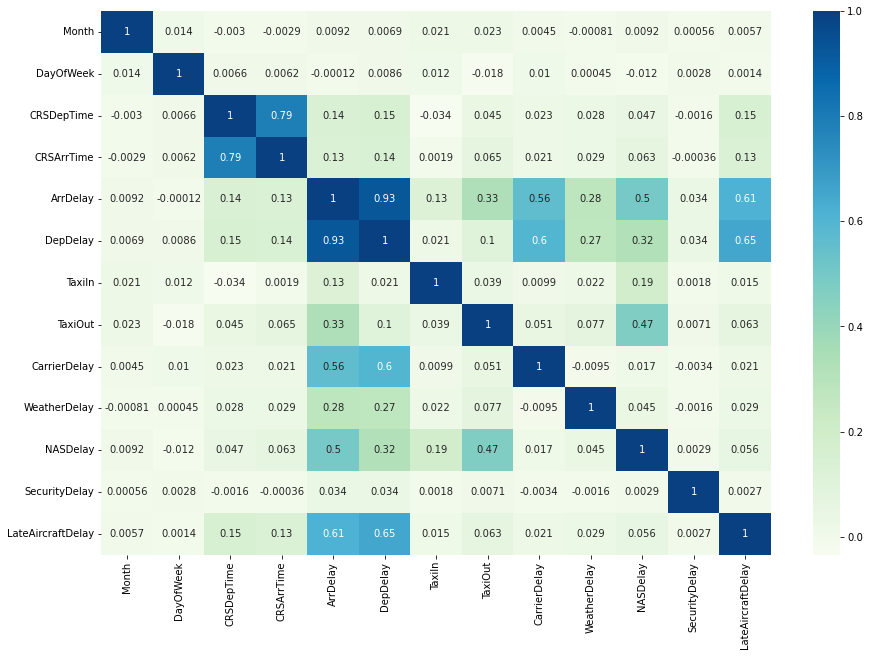

In [10]:
corr = q5.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="GnBu",annot=True)
plt.show()

## create the target variable

In [11]:
q5["ArrDelay"] = np.where(q5["ArrDelay"] > 0, 1, 0)

## subset q5 for target_y and target_x

In [12]:
target_y=q5["ArrDelay"] 
target_x=q5[["Month", "DayOfWeek", "CRSDepTime", "CRSArrTime","DepDelay", "CarrierDelay","WeatherDelay","NASDelay","LateAircraftDelay", "TaxiOut"]]

## Split the data into training and testing sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(target_x, target_y, test_size=0.2, random_state=0)

## Scale the data using StandardScaler

In [14]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Print the classification report

In [15]:
def train_models(X_train, X_test, y_train, y_test):
    models = [LogisticRegression()]

    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        print(f"Model: {type(model).__name__}\n")
        print("Confusion Matrix:\n", cm)
        print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [16]:
train_models(X_train, X_test, y_train, y_test)

Model: LogisticRegression

Confusion Matrix:
 [[1412060  114413]
 [ 361490  965823]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86   1526473
           1       0.89      0.73      0.80   1327313

    accuracy                           0.83   2853786
   macro avg       0.85      0.83      0.83   2853786
weighted avg       0.84      0.83      0.83   2853786



## Train Logistic Regression

In [17]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

## Make predictions on the test set

In [18]:
y_pred_lr = lr.predict(X_test)

## Plot a confusion matrix

Text(0.5, 15.0, 'Predicted Values')

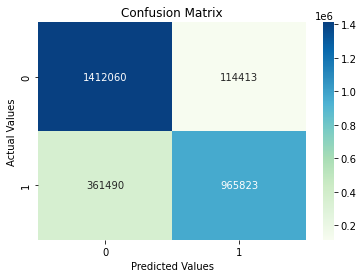

In [19]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.title("Confusion Matrix")
sns.heatmap(cm_lr, annot=True, fmt='d', cmap = 'GnBu')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

## Calculate and plot the ROC curve

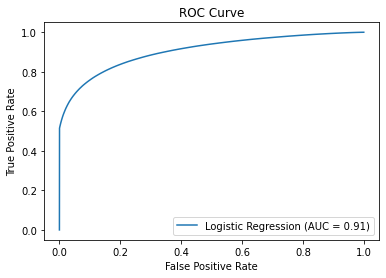

In [20]:
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Print the accuracy score

In [21]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr

0.8332380213512857